In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('test.csv')

print(titanic.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [3]:
print(titanic.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)

C:\Users\Sam\AppData\Local\Temp\ipykernel_27576\4247855172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(),inplace=True)


In [5]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

C:\Users\Sam\AppData\Local\Temp\ipykernel_27576\565283480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [6]:
titanic.drop(columns=['Cabin'], inplace=True)

In [7]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [9]:
print(titanic.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [10]:
print(titanic.describe())

       PassengerId      Pclass         Sex         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550    0.363636   29.599282    0.447368   
std     120.810458    0.841838    0.481622   12.703770    0.896760   
min     892.000000    1.000000    0.000000    0.170000    0.000000   
25%     996.250000    1.000000    0.000000   23.000000    0.000000   
50%    1100.500000    3.000000    0.000000   27.000000    0.000000   
75%    1204.750000    3.000000    1.000000   35.750000    1.000000   
max    1309.000000    3.000000    1.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


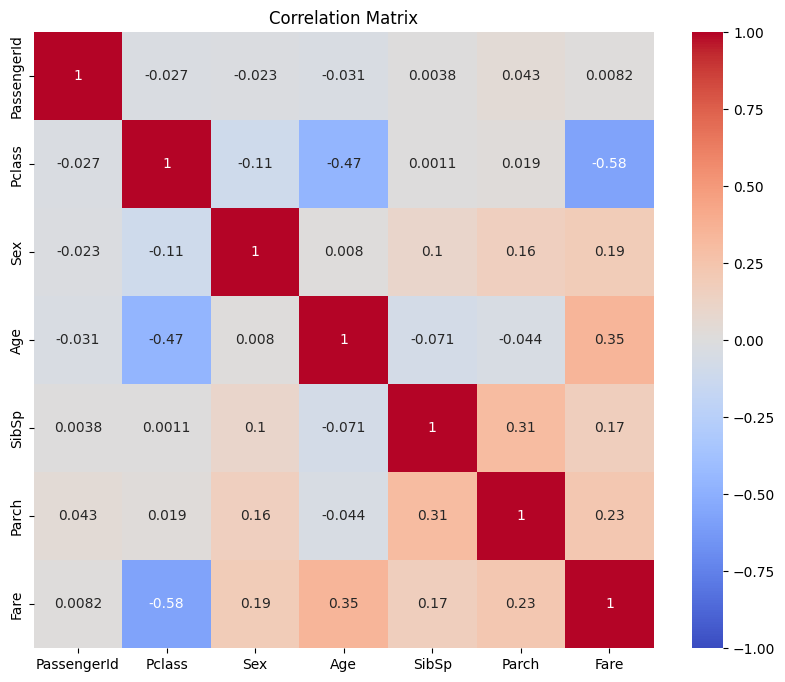

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation matrix
numeric_cols = titanic.select_dtypes(include=['float64', 'int64']).columns

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(titanic[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


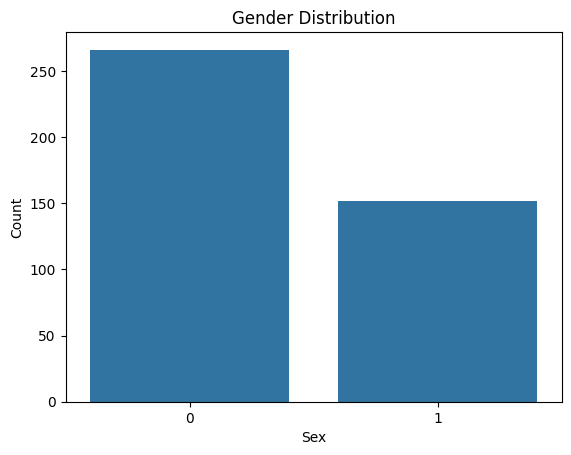

In [17]:
# Plot gender distribution
sns.countplot(x='Sex', data=titanic)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


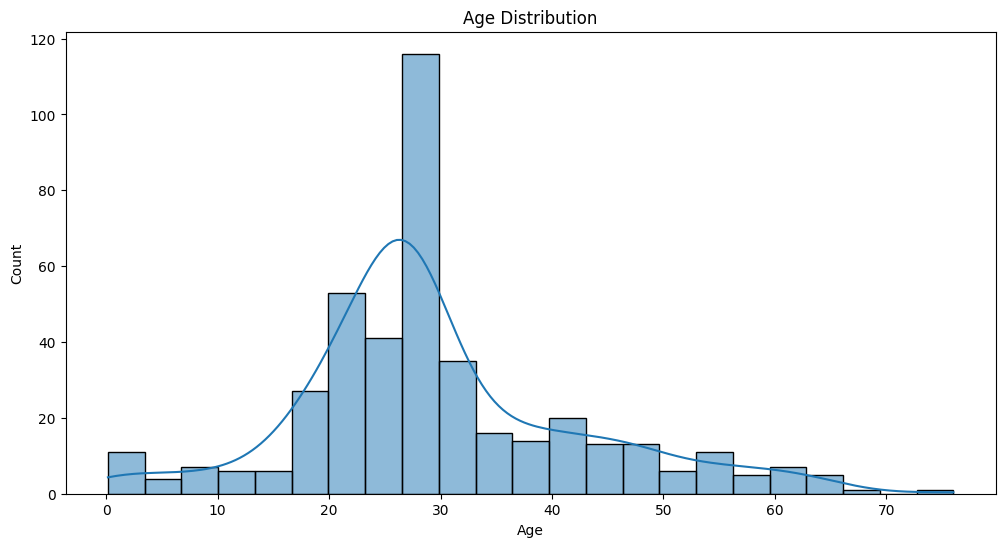

In [18]:
# Plot age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


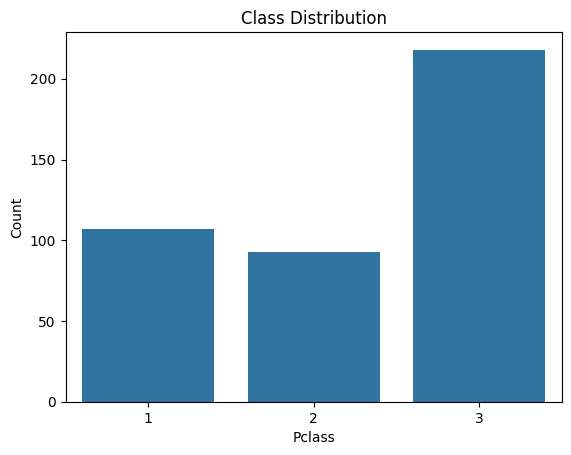

In [19]:
# Plot class distribution
sns.countplot(x='Pclass', data=titanic)
plt.title('Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


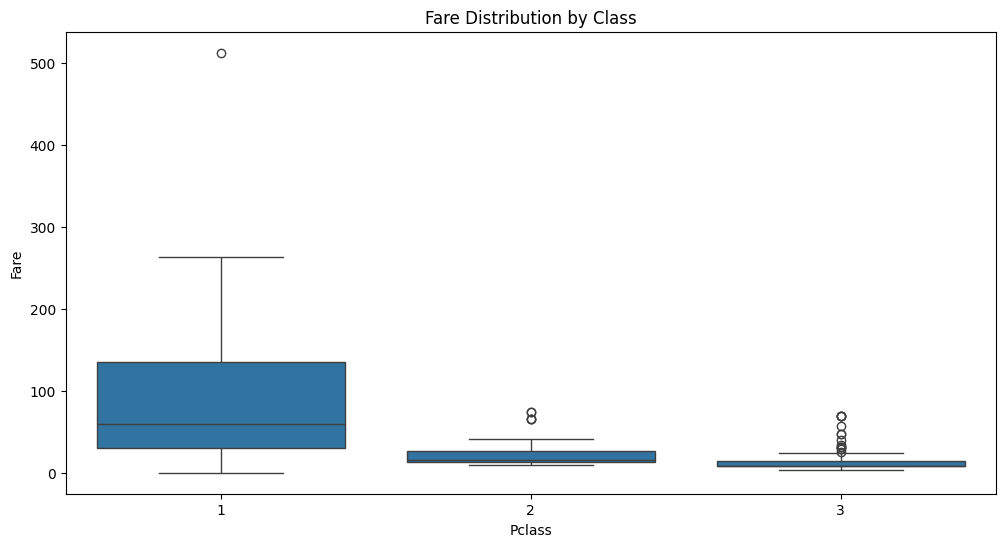

In [20]:
# Plot fare distribution by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Fare Distribution by Class')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()
